<a href="https://colab.research.google.com/github/neuroboy-sohaib/ML-Deep-Learning-codes/blob/master/Smart_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install a Drive FUSE wrapper.
 # https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null 
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 130963 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.6-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
# Generate auth tokens for Colab

from google.colab import auth 
auth.authenticate_user()

In [0]:
# Generate creds for the Drive FUSE library.

from oauth2client.client import GoogleCredentials 
creds = GoogleCredentials.get_application_default()
import getpass 
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass() 
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
!ls "/content/drive/Colab Notebooks"

 2019-01-01.csv			   Regression_1.ipynb
 additionalTrainData.csv	   release_dates_per_country.csv
 blend_lgb_xgb.csv		   sample_submission.csv
 drive_stats_2019_Q1		   Smart_Classification
'EDA on Day1'			   TestAdditionalFeatures.csv
 Image_classify			   test.csv
 Internship			   Text_Classification@Precily
 lgb.csv			   TMDB_1.ipynb
 precily.ipynb			   TrainAdditionalFeatures.csv
 preprocessed_stripped.csv	   train.csv
 preprocessed_stripped_noNaN.csv   trainV3.csv
 Regression_0.ipynb		   xgb.csv


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

import time
from subprocess import check_output

### Will fill NaN with mean value of the respective column

In [0]:
data = pd.read_csv('/content/drive/Colab Notebooks/preprocessed_stripped.csv')
data.fillna(data.mean(), inplace=True)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18090 entries, 0 to 18089
Data columns (total 7 columns):
Unnamed: 0       18090 non-null int64
failure          18090 non-null int64
smart_5_raw      18090 non-null float64
smart_187_raw    18090 non-null float64
smart_188_raw    18090 non-null float64
smart_197_raw    18090 non-null float64
smart_198_raw    18090 non-null float64
dtypes: float64(5), int64(2)
memory usage: 989.4 KB


In [0]:
data.head()  

,Unnamed: 0,failure,smart_5_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw
0,3102,1,16.0,0.000000,0.000000e+00,0.0,0.0
1,13545,1,0.0,3.718898,2.358253e+08,8.0,0.0
2,36527,1,2392.0,1.000000,0.000000e+00,0.0,0.0
3,57991,1,0.0,38.000000,0.000000e+00,56.0,56.0
4,63244,1,1920.0,0.000000,0.000000e+00,24.0,24.0


In [0]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns=['Serial No', 'failure', 'smart_5_raw ','smart_187_raw ','smart_188_raw','smart_197_raw','smart_198_raw'])

In [0]:
# y includes our labels and x includes our features
y = scaled_df.failure                     
x = scaled_df.drop('failure',axis = 1 )
x.head()

,Serial No,smart_5_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw
0,0.027370,0.000245,0.000000,0.000000,0.000000,0.000000
1,0.124229,0.000000,0.002158,0.005491,0.001224,0.000000
2,0.337386,0.036638,0.000580,0.000000,0.000000,0.000000
3,0.536465,0.000000,0.022055,0.000000,0.008568,0.008568
4,0.585186,0.029408,0.000000,0.000000,0.003672,0.003672


### Classes are highly imbalanced, dealt with them at the end using SMOTE

Number of Pass:  17659
Number of Fail :  431


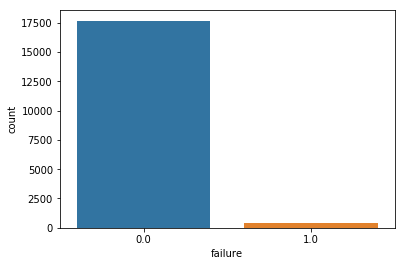

In [0]:
ax = sns.countplot(y,label="Count")       
P, F = y.value_counts()
print('Number of Pass: ',P)
print('Number of Fail : ',F)

In [0]:
x.describe()

,Serial No,smart_5_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw
count,18090.000000,18090.000000,18090.000000,18090.000000,18090.000000,18090.000000
mean,0.486055,0.011233,0.002158,0.005491,0.001505,0.001471
std,0.297428,0.066022,0.021539,0.046583,0.012151,0.012148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.213649,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.477670,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.746538,0.000123,0.002158,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

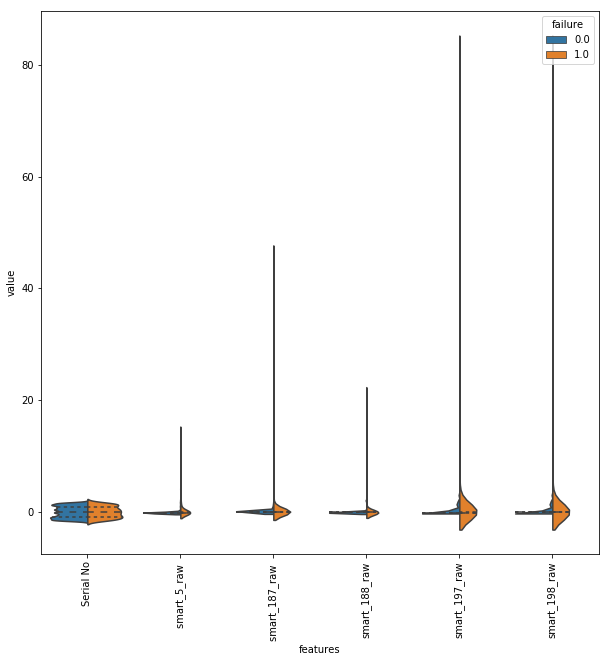

In [0]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="failure",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="failure", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

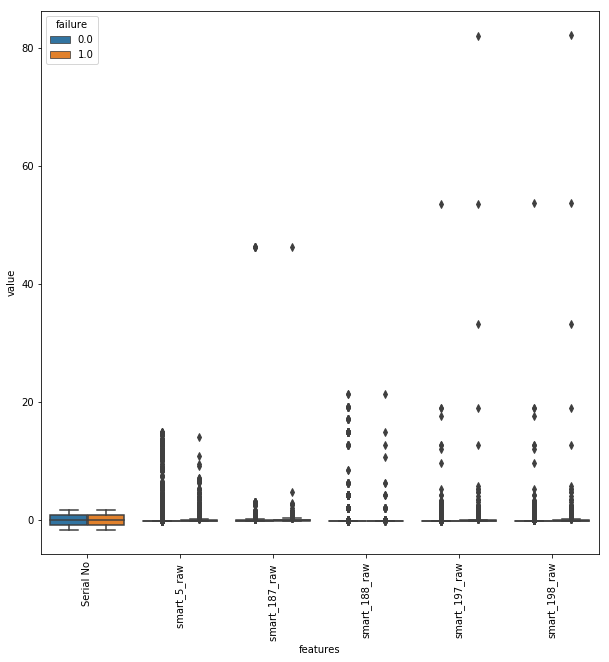

In [0]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="failure", data=data)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1203: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1205: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
/us

ZeroDivisionError: ignored

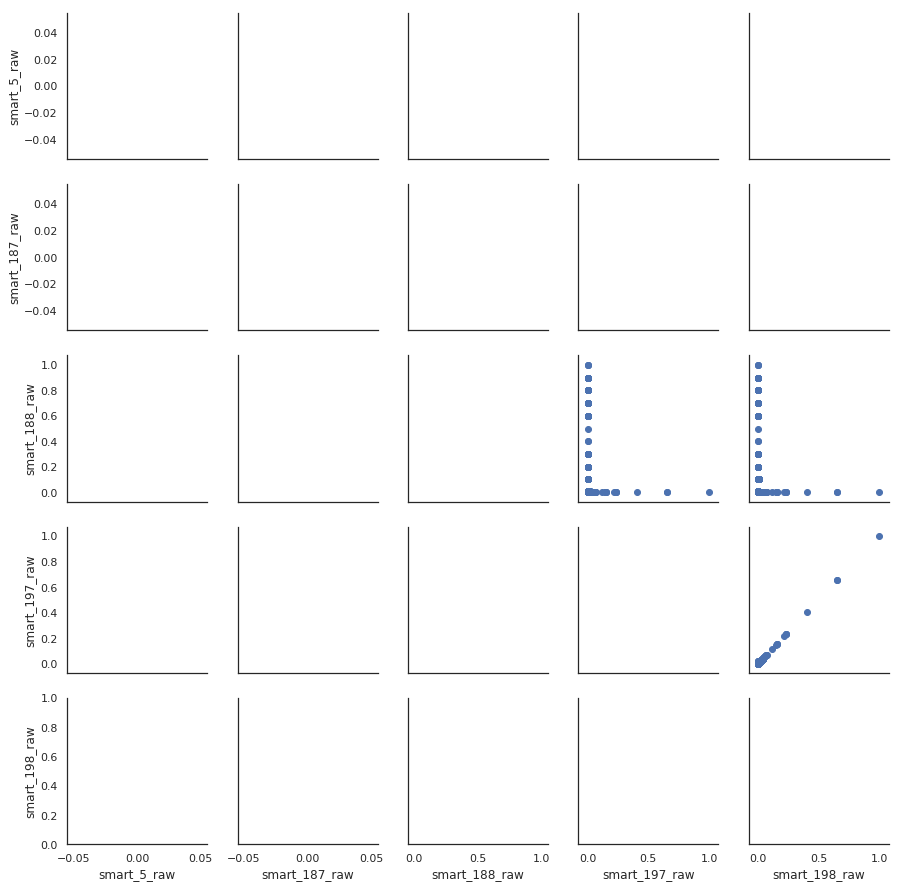

In [0]:
sns.set(style="white")
df = x.loc[:,['smart_5_raw','smart_187_raw','smart_188_raw','smart_197_raw','smart_198_raw']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

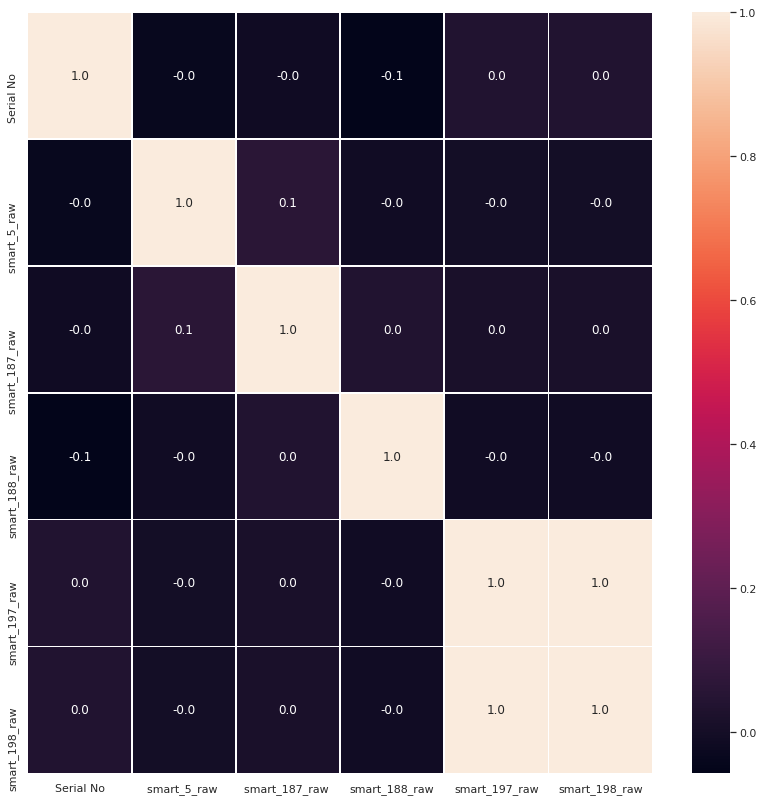

In [0]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is:  0.9646213377556662


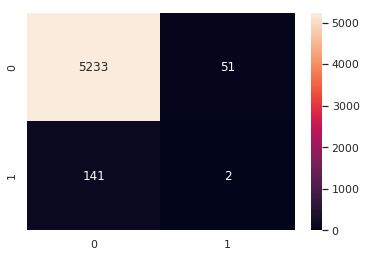

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [0]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [ 0.02862785 19.25738994  0.19317071  1.84569005 18.31605345 18.19235892]
Feature list: Index(['Serial No', 'smart_5_raw ', 'smart_187_raw ', 'smart_188_raw',
       'smart_197_raw', 'smart_198_raw'],
      dtype='object')


### If only the 5 best features were used, then RF implemented. ( A little increase in accuracy)

Accuracy is:  0.9699649898654874


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


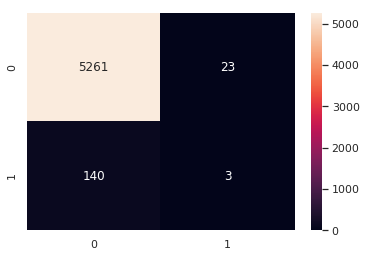

In [0]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [0]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

Optimal number of features : 3
Best features : Index(['Serial No', 'smart_5_raw ', 'smart_187_raw '], dtype='object')


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


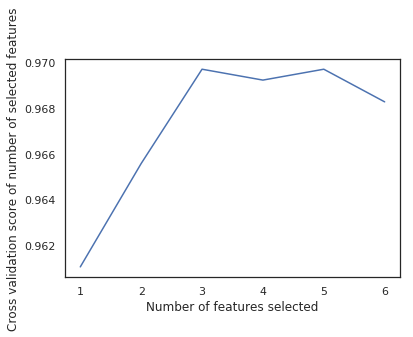

In [0]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### SMOTE Implementation

In [0]:
data = pd.read_csv('/content/drive/Colab Notebooks/preprocessed_stripped.csv')
data.fillna(data.mean(), inplace=True)

In [0]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=['Serial No', 'failure', 'smart_5_raw ','smart_187_raw ','smart_188_raw','smart_197_raw','smart_198_raw'])

In [0]:
# y includes our labels and x includes our features
y = scaled_data.failure                     
X = scaled_data.drop('failure',axis = 1 )
X.head()

,Serial No,smart_5_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw
0,0.027370,0.000245,0.000000,0.000000,0.000000,0.000000
1,0.124229,0.000000,0.002158,0.005491,0.001224,0.000000
2,0.337386,0.036638,0.000580,0.000000,0.000000,0.000000
3,0.536465,0.000000,0.022055,0.000000,0.008568,0.008568
4,0.585186,0.029408,0.000000,0.000000,0.003672,0.003672


In [0]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (12663, 6)
Number transactions y_train dataset:  (12663,)
Number transactions X_test dataset:  (5427, 6)
Number transactions y_test dataset:  (5427,)


In [0]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 301
Before OverSampling, counts of label '0': 12362 

After OverSampling, the shape of train_X: (24724, 6)
After OverSampling, the shape of train_y: (24724,) 

After OverSampling, counts of label '1': 12362
After OverSampling, counts of label '0': 12362


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is:  0.9227554596926395


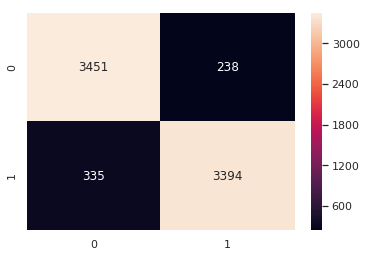

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

### Feature Scoring after SMOTE

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', X.columns)

Score list: [1.51125361e-02 8.39984693e+01 7.55534491e+00 5.84163173e+00
 3.98850112e+01 3.98107394e+01]
Feature list: Index(['Serial No', 'smart_5_raw ', 'smart_187_raw ', 'smart_188_raw',
       'smart_197_raw', 'smart_198_raw'],
      dtype='object')


### LGBM Implementation after SMOTE sampling

In [0]:
import lightgbm as lgb
# define dataset
train_data = lgb.Dataset(x_train, label=y_train,  free_raw_data=True)
test_data = lgb.Dataset(x_test, label=y_test,  free_raw_data=True)


In [0]:
params = {'num_leaves': 15,
         'min_data_in_leaf': 20,
         'objective': 'binary',
         'max_depth': 5,
         'learning_rate': 0.03,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": ['auc','binary_logloss'],
         "lambda_l1": 0.04,
         "verbosity": -1}

In [0]:
gbm = lgb.train(params, train_data, 3000, valid_sets=[train_data, test_data], \
                valid_names = ['train', 'valid'], evals_result=evals_result, \
                early_stopping_rounds=250, verbose_eval=100)

Training until validation scores don't improve for 250 rounds.
[100]	train's binary_logloss: 0.374014	train's auc: 0.923649	valid's binary_logloss: 0.388237	valid's auc: 0.915502
[200]	train's binary_logloss: 0.313063	train's auc: 0.944553	valid's binary_logloss: 0.32926	valid's auc: 0.935643
[300]	train's binary_logloss: 0.276845	train's auc: 0.957901	valid's binary_logloss: 0.294156	valid's auc: 0.950228
[400]	train's binary_logloss: 0.251472	train's auc: 0.966191	valid's binary_logloss: 0.269187	valid's auc: 0.958888
[500]	train's binary_logloss: 0.232501	train's auc: 0.971815	valid's binary_logloss: 0.25106	valid's auc: 0.964929
[600]	train's binary_logloss: 0.217062	train's auc: 0.975826	valid's binary_logloss: 0.236725	valid's auc: 0.968924
[700]	train's binary_logloss: 0.204695	train's auc: 0.978559	valid's binary_logloss: 0.224985	valid's auc: 0.971812
[800]	train's binary_logloss: 0.194384	train's auc: 0.980701	valid's binary_logloss: 0.21572	valid's auc: 0.973803
[900]	train'